# Impact of Weather on traffic

## Table of Content

#### [Disclaimer](#Discl) <br>

#### [1. Importing Libraries](#import1) <br>

#### [2. Datasets](#Datasets1)
[2.1 Loading Datasets](#DatasetsLoad1)  
[2.2 Getting Insights...](#DatasetsIns1)  
[2.2.1 ...for company and trips](#DatasetsInsA1)<br>
[2.2.2 ...for trip targets](#DatasetsInsB1)  
[2.2.3 ...for date-weather-duration](#DatasetsInsC1)<br>
[2.3 Chapter Conclusion](#DatasetsInsConc1)<br>

#### [3. Exploratory data analysis](#EDA1)
[3.1 Top ten neigherborhoods in terms of drop-offs](#Top10N1)  
[3.2 Most used companies](#Top10COM1)  
[3.3. Chapter Conclusion](#EDAConc1)<br>

#### [4. Testing hypotheses](#HYPO1)
[4.1 Visualize the data](#HYPOViz1)  
[4.2 Wilcoxon-Mann-Whitney function](#HYPOtest1)  
[4.3. Chapter Conclusion](#HYPOConc1)<br>

#### [5. Final Conclusion](#Final1)

---

<a id='Discl'></a>

## Disclaimer

This Project analysis the correlation the traffic and the weather condition.

---

<a id='Import1'></a>

## 1. Importing Libraries

In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

from scipy import stats as st
from scipy.stats import mannwhitneyu

from functools import reduce
from io import BytesIO
import requests
import os

import seaborn as sns

from scipy import stats as st

We imported all necessary libraries to work further with the given data.

---

<a id='Datasets1'></a>
<a id='Datasets2'></a>

## 2. Datasets

<a id='DatasetsLoad1'></a>
<a id='DatasetsLoad2'></a>

[2.1 Loading Datasets](#DatasetsLoad2)  
[2.2 Getting Insights...](#DatasetsIns2)  
[2.2.1 ...for company and trips](#DatasetsInsA2)<br>
[2.2.2 ...for trip targets](#DatasetsInsB2)  
[2.2.3 ...for date-weather-duration](#DatasetsInsC2)<br>
[2.3 Chapter Conclusion](#DatasetsInsConc2)

### 2.1 Loading Datasets

In [2]:
try:
    company_and_trips = pd.read_csv('project_sql_result_01.csv')
    trip_targets = pd.read_csv('project_sql_result_04.csv')
    date_weather_duration = pd.read_csv('project_sql_result_07.csv')
    
except:
    sp_company_and_trips_id = '1Ed_abLfRpwyj22G5MkH-AuenvKQkidXbsfVx2HKK3HY'
    company_and_trips_id_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(sp_company_and_trips_id)
    r1 = requests.get(company_and_trips_id_file)
    company_and_trips = pd.read_csv(BytesIO(r1.content))
    
    sp_trip_targets_id = '1Me33oWL1eMm9OOUcmcAKg_OUNU01P9kxYRJxf7KQsQI'
    trip_targets_id_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(sp_trip_targets_id)
    r2 = requests.get(trip_targets_id_file)
    trip_targets = pd.read_csv(BytesIO(r2.content))
    
    sp_date_weather_duration_id = '1RHguoZCgXAe60UTyxko8g97UHMtIdGGjRf8HcjzdfL4'
    date_weather_duration_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(sp_date_weather_duration_id)
    r3 = requests.get(date_weather_duration_file)
    date_weather_duration = pd.read_csv(BytesIO(r3.content))

<a id='DatasetsIns1'></a>
<a id='DatasetsIns2'></a>

### 2.2 Getting Insights

In [4]:
def insight(pd):
    
    print('Data overview:')
    display(pd)
    print()
    print('Data description:')
    display(pd.describe())
    print()
    print('Looking for missing values:')
    display(pd.isna().mean().reset_index())
    print()
    print('Looking for dublicated values:')
    display(pd.duplicated().sum())

Hence we're going to check all of our imported datasets, we wrote a custom function to chech each dataset in the same order. That's being said, we looking at:

    1. Our Dataset
    2. Values such as mean, median, etc.
    3. Checking for missing values
    4. As well as for dublicates

<a id='DatasetsInsA1'></a>
<a id='DatasetsInsA2'></a>

### 2.2.1 for company_and_trips:

In [5]:
insight(company_and_trips)

Data overview:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3



Data description:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000



Looking for missing values:


,index,0
0,company_name,0.0
1,trips_amount,0.0



Looking for dublicated values:


0

As for the dataframe `company_and_trips`, we can see that the data entries for the column **trips_amount**, the mean is way higher then the median, skewed on a total entries of 64 rows. 
Since we worked previosly with SQL on our Databases, there shouldn't be any missing values.

<a id='DatasetsInsB1'></a>
<a id='DatasetsInsB2'></a>

### 2.2.2 for trip_targets:

In [6]:
insight(trip_targets)

Data overview:


,dropoff_location_name,average_trips
0,Loop,10727.466670
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538



Data description:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466670



Looking for missing values:


,index,0
0,dropoff_location_name,0.0
1,average_trips,0.0



Looking for dublicated values:


0

As for the dataframe `trip_targets`, we can see that the data entries for the column **average_trips**, the mean is way higher then the median, skewed on a total entries of 93 rows. 
Since we worked previosly with SQL on our Databases, there shouldn't be any missing values.

<a id='DatasetsInsC1'></a>
<a id='DatasetsInsC2'></a>

### 2.2.3 for date_weather_duration:

In [7]:
insight(date_weather_duration)

Data overview:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380



Data description:


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000



Looking for missing values:


,index,0
0,start_ts,0.0
1,weather_conditions,0.0
2,duration_seconds,0.0



Looking for dublicated values:


197

As for the dataframe `date_weather_duration`, we can see that the data entries for the column **duration_seconds**, the mean is almost the same as the median, skewed on a total entries of 1068 rows.
Since we worked previosly with SQL on our Databases, there shouldn't be any missing values.



<a id='DatasetsInsConc1'></a>
<a id='DatasetsInsConc2'></a>

### 2.3 Chapter Conclusion

We looked at our extracted and parsed data and validate them on any corruptions. So far, no missing values were detected.

[Back to top](#top) | [Back to Chapterstart: Hypthesis testing](#Hypo2)

---

<a id='EDA1'></a>
<a id='EDA2'></a>

## 3. Exploratory data analysis

[3.1 Top ten neigherborhoods in terms of drop-offs](#Top10N2)  
[3.2 Most used companies](#Top10COM2)  
[3.3. Chapter Conclusion](#EDAConc2)<br>

<a id='Top10N1'></a>
<a id='Top10N2'></a>

### 3.1 Top ten neigherborhoods in terms of drop-offs

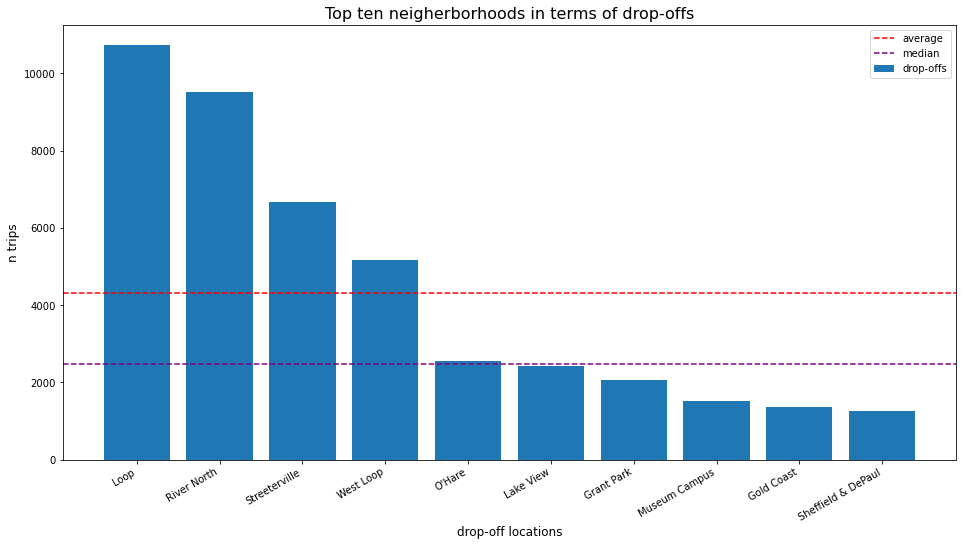

,dropoff_location_name,average_trips
0,Loop,10727.466670
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [45]:
topten_hoods = trip_targets.query('average_trips >= 1250')

topten_hoods_mean = topten_hoods['average_trips'].mean()
topten_hoods_median = topten_hoods['average_trips'].median()

plt.figure(figsize= (16,8))

plt.bar(topten_hoods['dropoff_location_name'], topten_hoods['average_trips'], label= 'drop-offs')
plt.axhline(y= topten_hoods_mean, color= 'red', linestyle='--', label= 'average')
plt.axhline(y= topten_hoods_median, color= 'purple', linestyle='--', label= 'median')
plt.xticks(rotation= 30, ha= 'right')

plt.title('Top ten neigherborhoods in terms of drop-offs', size= 16)
plt.xlabel('drop-off locations', size= 12)
plt.ylabel('n trips', size= 12)
plt.legend()
plt.show()

display(topten_hoods)

As we can see, the `'Loop'` neighborhood is four time higher as destination then `'O'Hare'` neighborhood. We can also see, that the top 4 destinations are raising the mean.

<a id='Top10COM1'></a>
<a id='Top10COM2'></a>

### 3.2 Most used companies

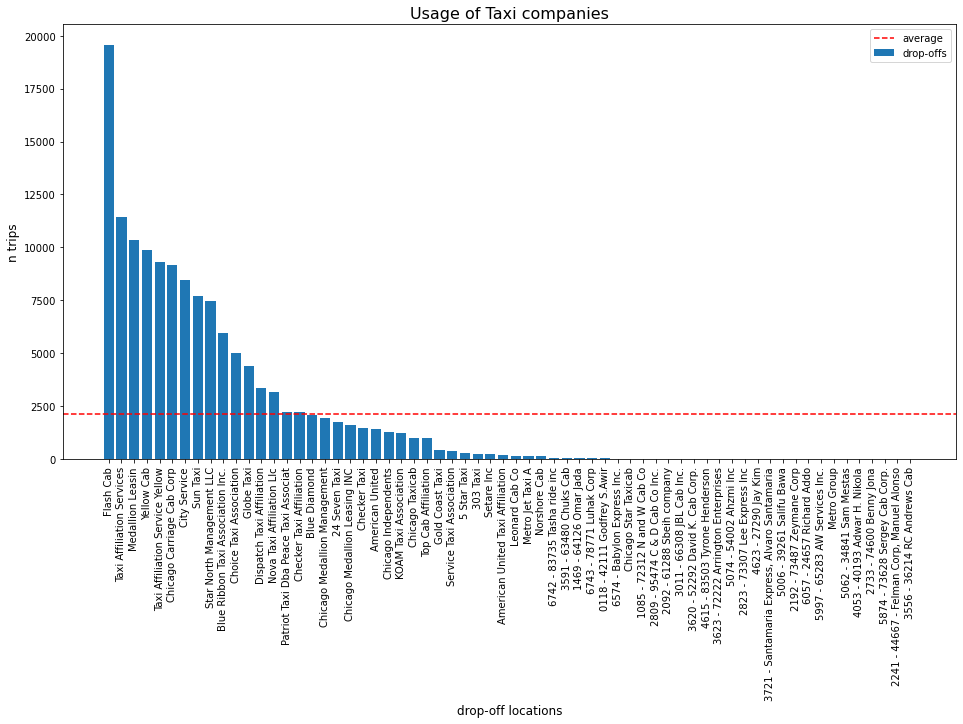

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [42]:
company_and_trips_mean = company_and_trips['trips_amount'].mean()

plt.figure(figsize= (16,8))

plt.bar(company_and_trips['company_name'], company_and_trips['trips_amount'], label= 'drop-offs')
plt.axhline(y= company_and_trips_mean, color= 'red', linestyle='--', label= 'average')
plt.xticks(rotation= 90)

plt.title('Usage of Taxi companies', size= 16)
plt.xlabel('drop-off locations', size= 12)
plt.ylabel('n trips', size= 12)
plt.legend()
plt.show()

display(company_and_trips)



Flash Cabs is the leading Cab company when it comes to the number of trips. 

<a id='EDAConc1'></a>
<a id='EDAConc2'></a>

### 3.3. Chapter Conclusion

Looking at our data, we can assume that the prominent cab companies could also have the largest car pool. 
The top destinations, however, have in common to be attractive leasure targets, so the passengers are more likely to travel to the harbor of Chicago, or the coast line of Lake Michigan, then to the Airport O'Hare.

[Back to top](#top) | [Back to Chapterstart: Hypthesis testing](#Hypo2)

----

<a id='HYPO1'></a>
<a id='HYPO2'></a>

## 4. Testing hypotheses

[4.1 Visualize the data](#HYPOViz2)  
[4.2 Wilcoxon-Mann-Whitney function](#HYPOtest2)  
[4.3. Chapter Conclusion](#HYPOConc2)<br>

<a id='HYPOViz1'></a>
<a id='HYPOViz2'></a>

### 4.1 Visualize the data

Thesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

**H<sub>0</sub>** = The average duration of rides from the Loop to O'Hare International Airport **remains the same** on rainy Saturdays <br>
**H<sub>1</sub>** = The average duration of rides from the Loop to O'Hare International Airport **changes** on rainy Saturdays

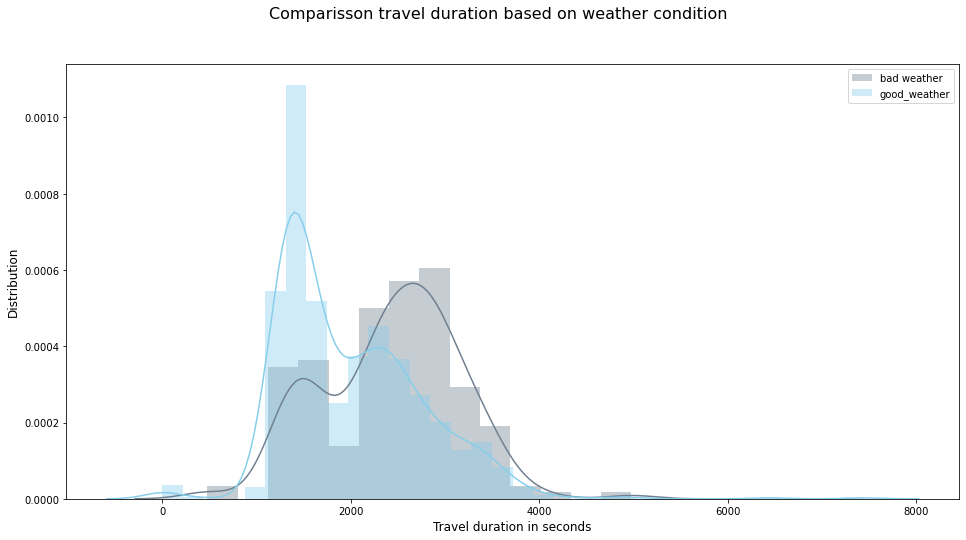

In [41]:
date_weather_duration_bad = date_weather_duration.loc[date_weather_duration['weather_conditions']=='Bad']\
                                                        .reset_index()
date_weather_duration_bad = date_weather_duration_bad.drop('index', axis=1)

date_weather_duration_good = date_weather_duration.loc[date_weather_duration['weather_conditions']=='Good']\
                                                        .reset_index()
date_weather_duration_good = date_weather_duration_good.drop('index', axis=1)


plt.figure(figsize= (16,8))
sns.distplot(date_weather_duration_bad['duration_seconds'], color = 'slategray', 
         label= 'bad weather')
sns.distplot(date_weather_duration_good['duration_seconds'], color = 'skyblue', 
        label= 'good_weather')

plt.suptitle('Comparisson travel duration based on weather condition', size= 16)
plt.xlabel('Travel duration in seconds', size= 12)
plt.ylabel('Distribution', size= 12)
plt.legend()
plt.show()




As we can see in the plot, the **good_weather-trips** are right skewed, while the **bad_weather-trips** are left skewed. We can asume that based on the distribution, the travel duration during bad weather could take longer compared to the trips during good weather.

<a id='HYPOtest1'></a>
<a id='HYPOtest2'></a>

### 4.2 Wilcoxon-Mann-Whitney function

In [35]:
def hypothesis(column, sample_group_1, sample_group_2):
    #print('Parameter:',column)

    groups = [sample_group_1, sample_group_2]
    alpha = 0.05 # critical statistical significance level
                            # if the p-value is less than alpha, we reject the hypothesis
        
    sample_array_1 = date_weather_duration[date_weather_duration[column] == sample_group_1]['duration_seconds']
    sample_array_2 = date_weather_duration[date_weather_duration[column] == sample_group_2]['duration_seconds']
    
    # Carrying out the Wilcoxon–Mann–Whitney test and printing results
    results = mannwhitneyu(sample_array_1, sample_array_2)
    results
    print()
    print('p-value: {:.3f}'.format(results.pvalue))

    # deciding whether we reject or not reject the null hypotheses based on pvalue and alpha
    if (results.pvalue < alpha):
            print("We reject the null hypothesis")
    else:
            print("We can't reject the null hypothesis")
    
    # calculating and printing additional info on mean, variance and standard deviation
    for group in groups:
        mean = date_weather_duration[date_weather_duration[column]==group]['duration_seconds'].mean()
        variance = np.var(date_weather_duration[date_weather_duration[column]==group]['duration_seconds'])
        std = np.std(date_weather_duration[date_weather_duration[column]==group]['duration_seconds'])
        print()
        print('Sample Group:', group)
        print('Mean: {:.2f}'.format(mean))
        print('Variance: {:.2f}'.format(variance))
        print('Standard deviation: {:.2f}'.format(std))

In [36]:
hypothesis('weather_conditions','Good','Bad')


p-value: 0.000
We reject the null hypothesis

Sample Group: Good
Mean: 1999.68
Variance: 575732.93
Standard deviation: 758.77

Sample Group: Bad
Mean: 2427.21
Variance: 517403.56
Standard deviation: 719.31


<a id='HYPOConc1'></a>
<a id='HYPOConc2'></a>

### Conclusion

Our `p-value` is below our significance-level of `5` %. That means our first assumption based on our visualisation are not at random. The average travel duration on rainy days is indeed differend then those trips in clear days.
So we rejact **H<sub>0</sub>**

[Back to top](#top) | [Back to Chapterstart: Hypthesis testing](#Hypo2)

****

<a id='Final1'></a>
<a id='Final2'></a>

## 5. Final Conclusion

We figured out that the passengers are rather traveling to the Chicago coastline then to the international Airport O'Hare, which makes sense. We also confirmed the Thesis **H<sub>1</sub>** and proved the point, that the traffic stalls on rainy days, which had an impact on the travel duration to O'Hare Airport.

[Back to top](#top)